In [1]:
# Basic
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from pathlib import Path
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Input,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping# Basic


In [2]:
# Path ke dataset
dataset_dir = "C:/Users/DELL/komputer vision/dataset_animal"

# Preprocessing dan augmentasi (bisa diatur sesuai kebutuhan)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% data untuk validasi
)

# Load data training
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load data validasi
val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 991 images belonging to 4 classes.
Found 247 images belonging to 4 classes.


In [3]:
from pathlib import Path

# Path ke dataset
image_dir = Path("C:/Users/DELL/komputer vision/dataset_animal")

# Ambil semua file gambar dari subfolder
filepaths = []
labels = []

for folder in image_dir.iterdir():
    if folder.is_dir():
        for img_file in folder.iterdir():
            if img_file.suffix.lower() in ['.jpg', '.jpeg', '.png']:
                filepaths.append(str(img_file))
                labels.append(folder.name)

# Masukkan ke dalam DataFrame
data = pd.DataFrame({
    "filepath": filepaths,
    "label": labels
})

data.head()


,filepath,label
0,C:\Users\DELL\komputer vision\dataset_animal\b...,bears
1,C:\Users\DELL\komputer vision\dataset_animal\b...,bears
2,C:\Users\DELL\komputer vision\dataset_animal\b...,bears
3,C:\Users\DELL\komputer vision\dataset_animal\b...,bears
4,C:\Users\DELL\komputer vision\dataset_animal\b...,bears


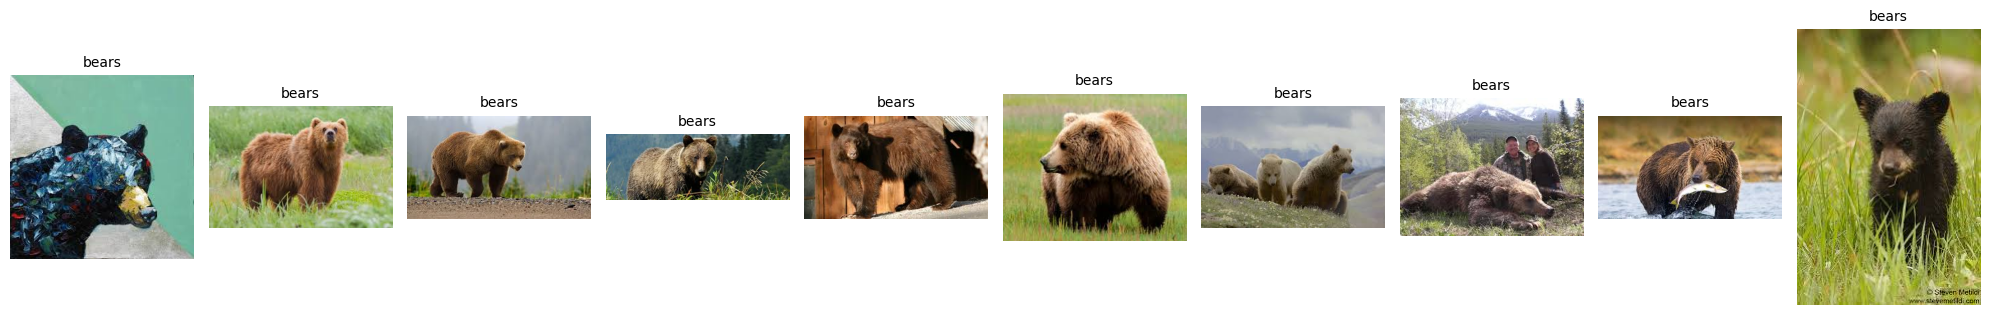

In [4]:
import os
import random

# nama kelas yang ingin di tampilkan
class_name = 'bears'
folder_path = f"C:/Users/DELL/komputer vision/dataset_animal/{class_name}"

# Ambil 10 file gambar secara acak
file_list = os.listdir(folder_path)
sample_files = random.sample(file_list, 10)

# Plot gambar
plt.figure(figsize=(20, 4))
for i, filename in enumerate(sample_files):
    img_path = os.path.join(folder_path, filename)
    image = imread(img_path)

    plt.subplot(1, 10, i+1)
    plt.imshow(image)
    plt.title(class_name, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


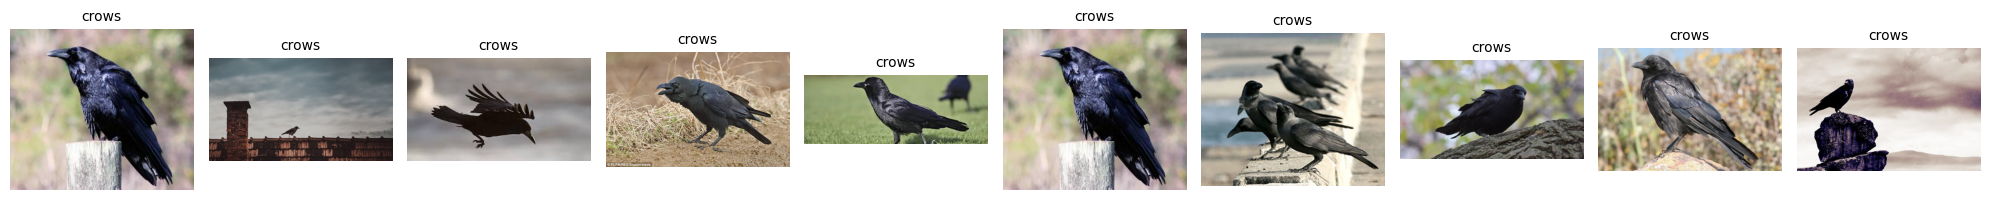

In [5]:
import os
import random

# nama kelas yang ingin di tampilkan
class_name = 'crows'
folder_path = f"C:/Users/DELL/komputer vision/dataset_animal/{class_name}"

# Ambil 10 file gambar secara acak
file_list = os.listdir(folder_path)
sample_files = random.sample(file_list, 10)

# Plot gambar
plt.figure(figsize=(20, 4))
for i, filename in enumerate(sample_files):
    img_path = os.path.join(folder_path, filename)
    image = imread(img_path)

    plt.subplot(1, 10, i+1)
    plt.imshow(image)
    plt.title(class_name, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


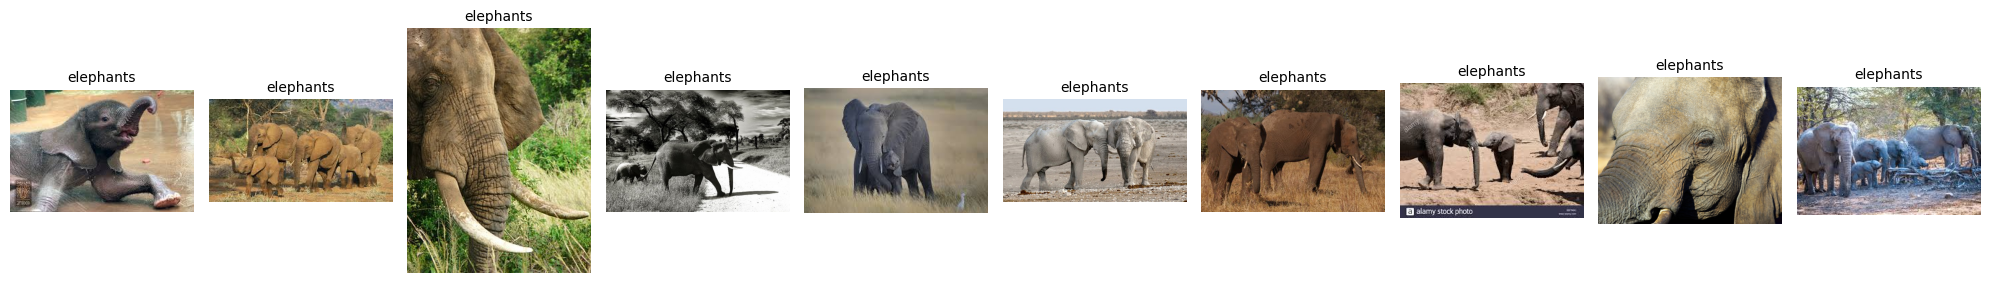

In [6]:
import os
import random

# nama kelas yang ingin di tampilkan
class_name = 'elephants'
folder_path = f"C:/Users/DELL/komputer vision/dataset_animal/{class_name}"

# Ambil 10 file gambar secara acak
file_list = os.listdir(folder_path)
sample_files = random.sample(file_list, 10)

# Plot gambar
plt.figure(figsize=(20, 4))
for i, filename in enumerate(sample_files):
    img_path = os.path.join(folder_path, filename)
    image = imread(img_path)

    plt.subplot(1, 10, i+1)
    plt.imshow(image)
    plt.title(class_name, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


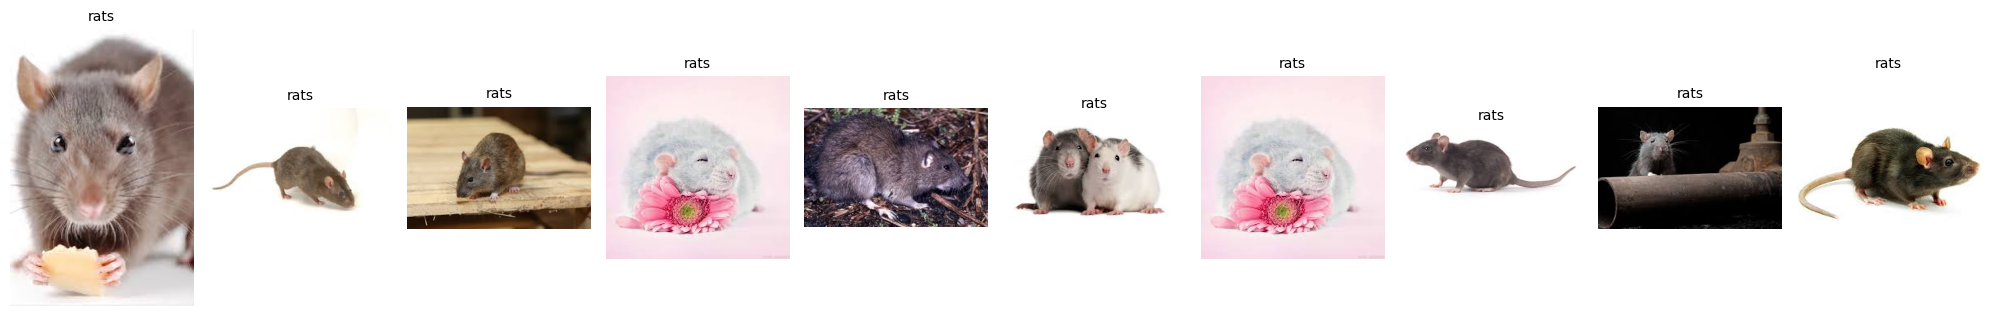

In [7]:
import os
import random

# nama kelas yang ingin di tampilkan
class_name = 'rats'
folder_path = f"C:/Users/DELL/komputer vision/dataset_animal/{class_name}"

# Ambil 10 file gambar secara acak
file_list = os.listdir(folder_path)
sample_files = random.sample(file_list, 10)

# Plot gambar
plt.figure(figsize=(20, 4))
for i, filename in enumerate(sample_files):
    img_path = os.path.join(folder_path, filename)
    image = imread(img_path)

    plt.subplot(1, 10, i+1)
    plt.imshow(image)
    plt.title(class_name, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
# Ambil label
labels = data['label']

# Split 80% train, 20% test+val
X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state=42)

# Dari 20% sisanya, split lagi 50-50 menjadi test dan validation (10% + 10%)
label_temp = X_temp['label']
X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_temp, random_state=42)

# Tampilkan hasil
print('The shape of train data:', X_train.shape)
print('The shape of test data:', X_test.shape)
print('The shape of validation data:', X_val.shape)

The shape of train data: (990, 2)
The shape of test data: (124, 2)
The shape of validation data: (124, 2)


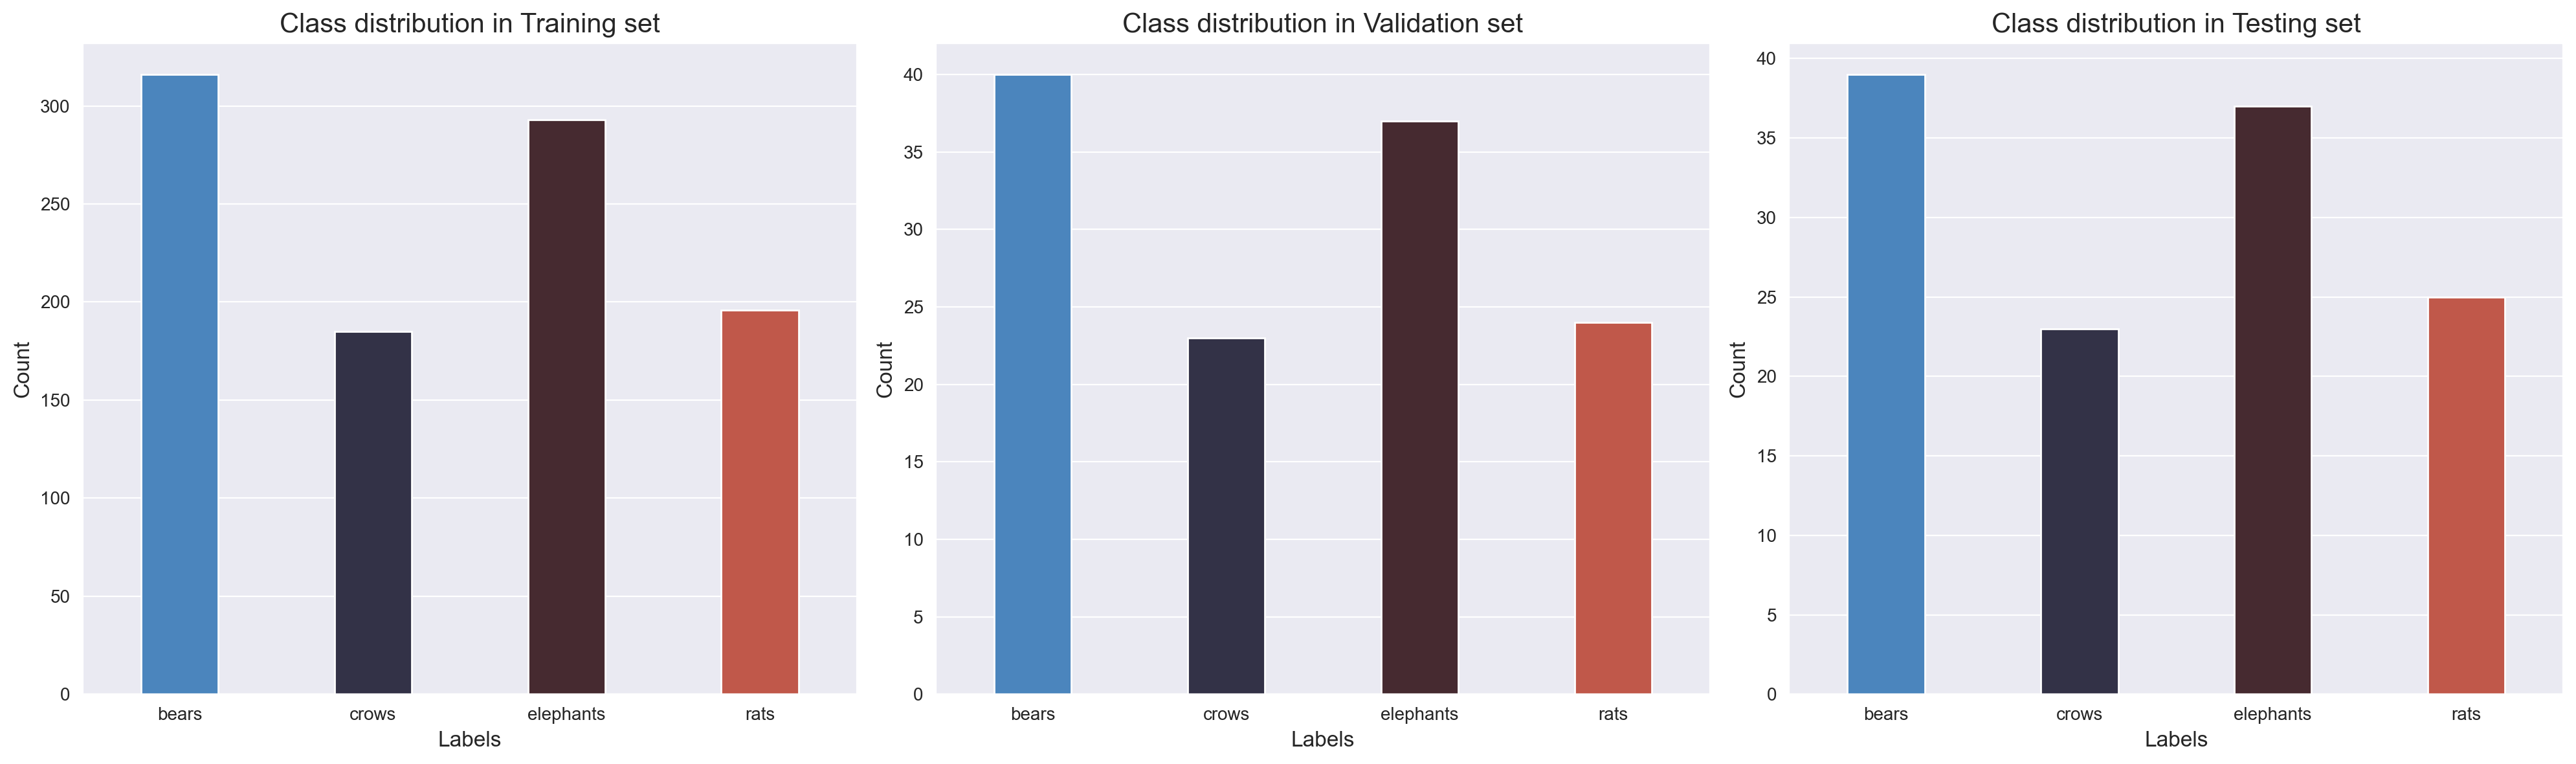

In [9]:
# Sesuaikan label sesuai dengan dataset Anda
labels = ['bears', 'crows', 'elephants', 'rats']

# Hitung jumlah label di setiap subset
label1, count1 = np.unique(X_train['label'], return_counts=True)
label2, count2 = np.unique(X_val['label'], return_counts=True)
label3, count3 = np.unique(X_test['label'], return_counts=True)

# Pastikan urutan sesuai dengan labels
count_dict1 = dict(zip(label1, count1))
count_dict2 = dict(zip(label2, count2))
count_dict3 = dict(zip(label3, count3))

uni1 = pd.DataFrame({'Count1': [count_dict1.get(l, 0) for l in labels]}, index=labels)
uni2 = pd.DataFrame({'Count2': [count_dict2.get(l, 0) for l in labels]}, index=labels)
uni3 = pd.DataFrame({'Count3': [count_dict3.get(l, 0) for l in labels]}, index=labels)

# Visualisasi
plt.figure(figsize=(20, 6), dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1.reset_index(), x='index', y='Count1', hue='index', palette='icefire', legend=False, width=0.4)\
    .set_title('Class distribution in Training set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2.reset_index(), x='index', y='Count2', hue='index', palette='icefire', legend=False, width=0.4)\
    .set_title('Class distribution in Validation set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(133)
sns.barplot(data=uni3.reset_index(), x='index', y='Count3', hue='index', palette='icefire', legend=False, width=0.4)\
    .set_title('Class distribution in Testing set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
from random import seed, random
# Setup
dataset_home = 'dataset_anml/'  # direktori output
subdirs = ['train/', 'test/']
labeldirs = ['bears/', 'crows/', 'elephants/','rats/']

# Buat struktur direktori
for subdir in subdirs:
    for labeldir in labeldirs:
        newdir = os.path.join(dataset_home, subdir, labeldir)
        makedirs(newdir, exist_ok=True)

# Set seed agar hasil acak
seed(1)

# Rasio data validasi (test)
val_ratio = 0.2

# Direktori sumber dataset
src_base = 'C:/Users/DELL/komputer vision/dataset_animal/'  

# Proses copy
for label in labeldirs:
    folder = os.path.join(src_base, label.strip('/'))  
    for file in listdir(folder):
        src = os.path.join(folder, file)
        dst_dir = 'train/' if random() >= val_ratio else 'test/'
        dst = os.path.join(dataset_home, dst_dir, label, file)
        copyfile(src, dst)

In [11]:
# Cek isi direktori
for split in ['train', 'test']:
    for label in ['bears', 'crows', 'elephants', 'rats']:
        path = os.path.join(dataset_home, split, label)
        print(f"Jumlah gambar '{label}' di {split}: {len(os.listdir(path))}")


Jumlah gambar 'bears' di train: 346
Jumlah gambar 'crows' di train: 221
Jumlah gambar 'elephants' di train: 325
Jumlah gambar 'rats' di train: 227
Jumlah gambar 'bears' di test: 111
Jumlah gambar 'crows' di test: 68
Jumlah gambar 'elephants' di test: 93
Jumlah gambar 'rats' di test: 86


In [12]:
# parameters
image_size = 64
image_channel = 3
bat_size = 16

# Creating image data generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

# Path ke folder utama dataset
base_path = "C:/Users/DELL/komputer vision/dataset_animal"

In [13]:
# Train
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    directory=base_path,
    x_col='filepath',
    y_col='label',
    target_size=(image_size, image_size),
    batch_size=bat_size,
    class_mode='categorical'
)

# Validation
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    directory=base_path,
    x_col='filepath',
    y_col='label',
    target_size=(image_size, image_size),
    batch_size=bat_size,
    class_mode='categorical',
    shuffle=False
)

# Test
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    directory=base_path,
    x_col='filepath',
    y_col='label',
    target_size=(image_size, image_size),
    batch_size=bat_size,
    class_mode='categorical',
    shuffle=False
)


Found 990 validated image filenames belonging to 4 classes.
Found 124 validated image filenames belonging to 4 classes.
Found 124 validated image filenames belonging to 4 classes.


In [14]:
train_gen = train_datagen.flow_from_directory(
    directory = r'C:/Users/DELL/komputer vision/dataset_anml/train',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=bat_size
)

val_gen = test_datagen.flow_from_directory(
    directory = r'C:/Users/DELL/komputer vision/dataset_anml/test',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=bat_size,
    shuffle=False
)

Found 1119 images belonging to 4 classes.
Found 358 images belonging to 4 classes.


In [15]:
# Model
model = Sequential()

# Input layer (menggunakan Input() untuk menghindari warning)
model.add(Input(shape=(image_size, image_size, image_channel)))

# Block 0 - Input + Conv
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output Layer - untuk 3 kelas (Boot, Sandal, Shoe)
model.add(Dense(4, activation='softmax'))

# Ringkasan
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       2

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',
                              patience=3,
                              restore_best_weights=True,
                              verbose=0)

In [17]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
anml = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[learning_rate_reduction, early_stoping]
)

Epoch 1/20
70/70 [==============================] - 25s 304ms/step - loss: 1.6629 - accuracy: 0.4683 - val_loss: 1.6351 - val_accuracy: 0.3101 - lr: 0.0010
Epoch 2/20
70/70 [==============================] - 10s 138ms/step - loss: 1.2012 - accuracy: 0.5576 - val_loss: 1.8845 - val_accuracy: 0.2989 - lr: 0.0010
Epoch 3/20
70/70 [==============================] - 9s 132ms/step - loss: 1.0847 - accuracy: 0.5710 - val_loss: 1.3709 - val_accuracy: 0.3883 - lr: 0.0010
Epoch 4/20
70/70 [==============================] - 10s 137ms/step - loss: 0.9815 - accuracy: 0.6095 - val_loss: 1.5358 - val_accuracy: 0.3687 - lr: 0.0010
Epoch 5/20
70/70 [==============================] - 10s 135ms/step - loss: 0.8458 - accuracy: 0.6693 - val_loss: 1.5706 - val_accuracy: 0.4162 - lr: 0.0010
Epoch 6/20
70/70 [==============================] - 10s 135ms/step - loss: 0.8125 - accuracy: 0.6935 - val_loss: 1.0312 - val_accuracy: 0.6285 - lr: 0.0010
Epoch 7/20
70/70 [==============================] - 9s 134ms/step

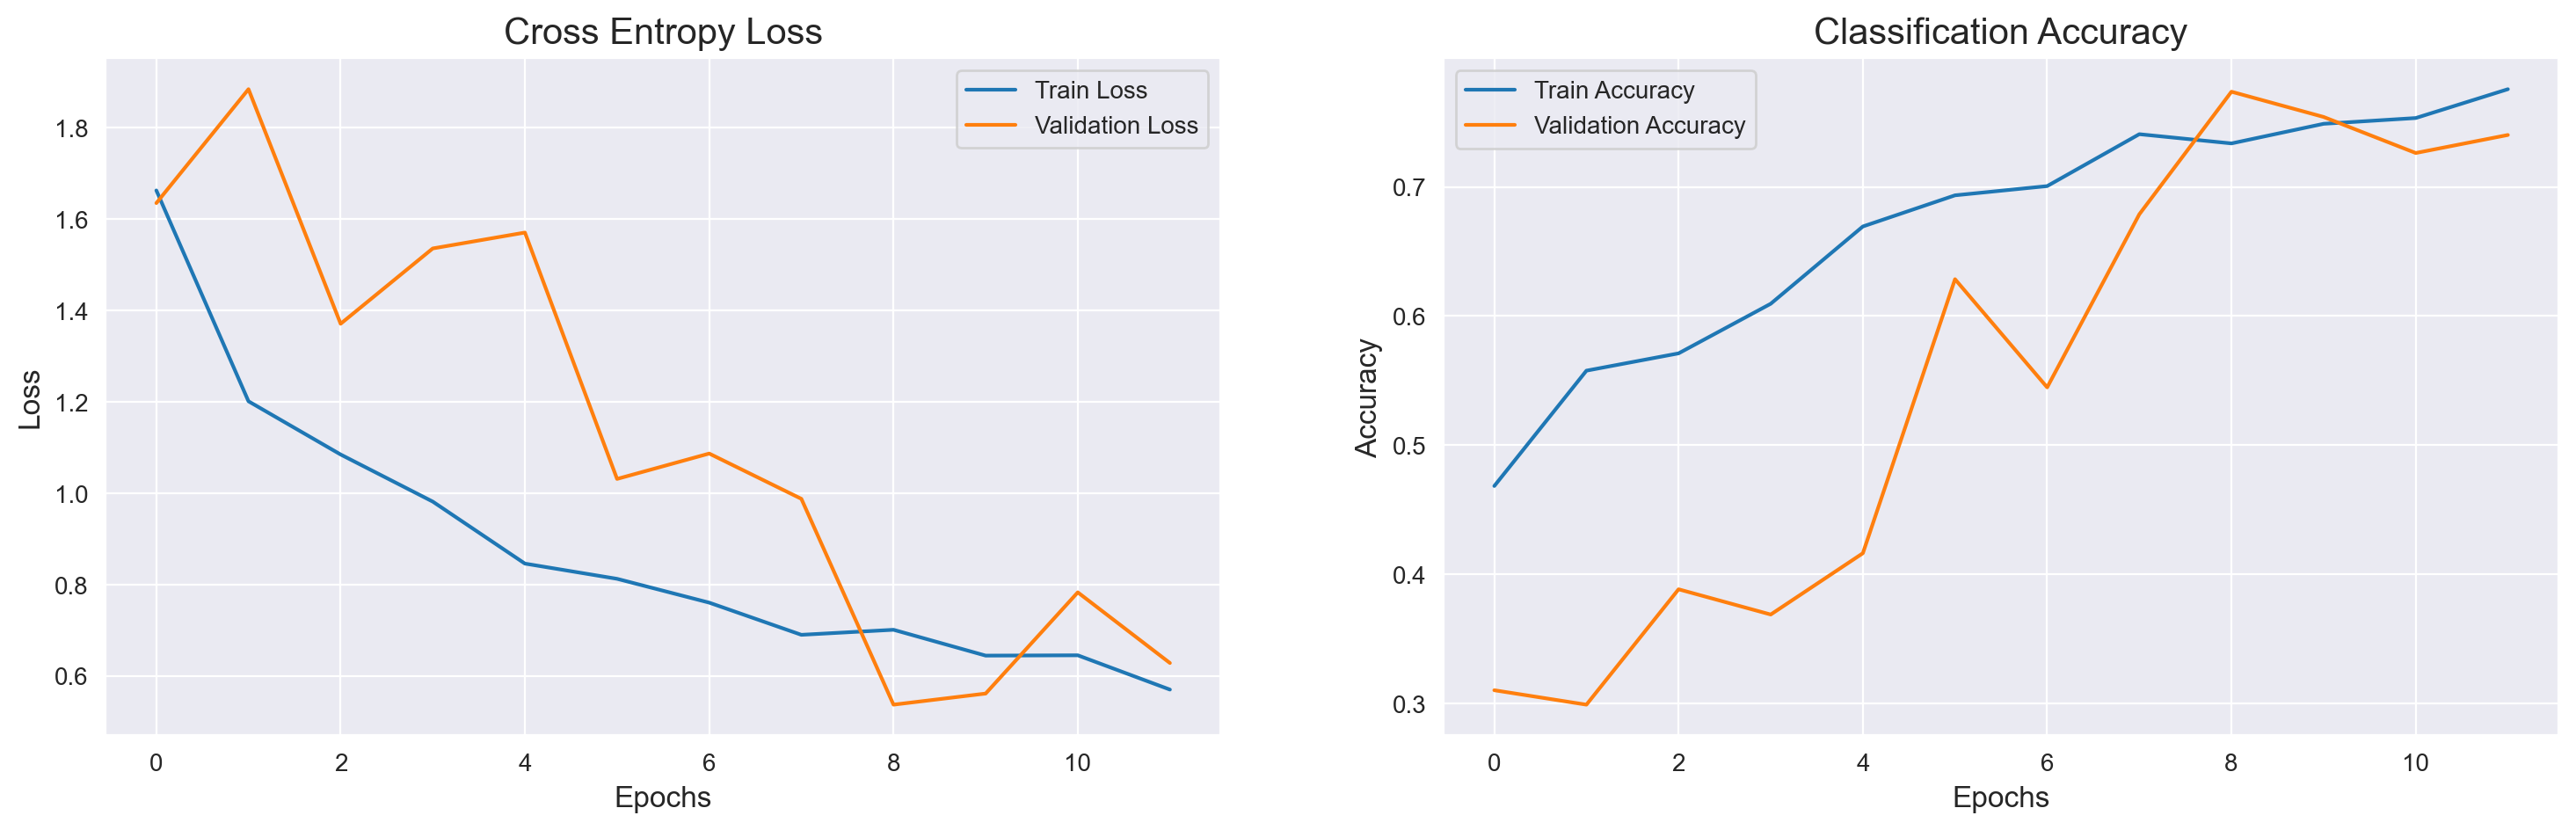

In [19]:
error = pd.DataFrame(anml.history)

plt.figure(figsize=(18,5), dpi=200)
sns.set_style('darkgrid')

# Loss
plt.subplot(121)
plt.title('Cross Entropy Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(error['loss'], label='Train Loss')
plt.plot(error['val_loss'], label='Validation Loss')
plt.legend()

# Accuracy
plt.subplot(122)
plt.title('Classification Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(error['accuracy'], label='Train Accuracy')
plt.plot(error['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()


In [20]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 71.81817889213562
The Loss of the model for training data is: 0.7258529663085938
The accuracy of the model for validation data is: 83.06451439857483
The Loss of the model for validation data is: 0.40582287311553955


In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
ModelCheckpoint("model.keras")

In [22]:
# prediction
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluvate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 75.80645084381104
The Loss of the model for testing data is: 0.5449211597442627


In [23]:
labels =['bears','crows','elephants','rats']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

       bears       0.83      0.64      0.72        39
       crows       0.95      0.87      0.91        23
   elephants       0.61      0.95      0.74        37
        rats       0.88      0.56      0.68        25

    accuracy                           0.76       124
   macro avg       0.82      0.75      0.77       124
weighted avg       0.80      0.76      0.76       124



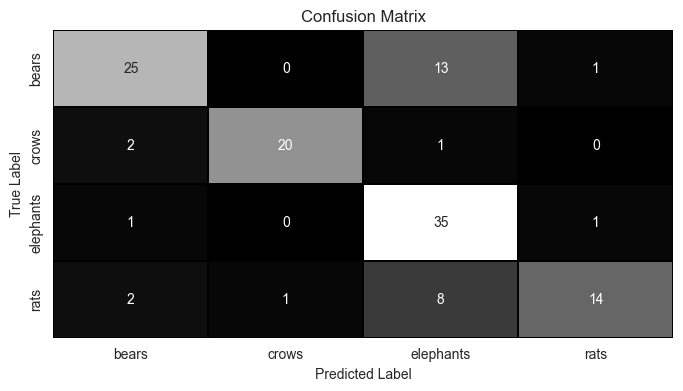

In [24]:
confusion_mtx = confusion_matrix(y_true,y_pred) 

f,ax = plt.subplots(figsize = (8,4),dpi=100)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=12)

plt.show()

In [31]:
# Parameter
size = (64, 64)
bat_size = 16

# Path ke folder test (lokal)
test_dir = "C:/Users/DELL/komputer vision/data_tes/"
filenames = os.listdir(test_dir)

# Buat DataFrame untuk test
test_data = pd.DataFrame({"filename": filenames})
test_data['label'] = 'unknown'  # placeholder, tidak digunakan dalam prediksi

# Data generator untuk test
test_datagen = ImageDataGenerator(rescale=1./255)

test1_idg = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=test_dir,
    x_col="filename",
    y_col="label",  # dummy, ignored in inference
    batch_size=bat_size,
    target_size=size,
    class_mode=None,
    shuffle=False
)

# Prediksi
test1_predict = model.predict(test1_idg, verbose=1)
test1_predict_argmax = np.argmax(test1_predict, axis=1)

# Tambahkan label prediksi ke DataFrame
test_data['label'] = test1_predict_argmax

# Mapping ke label string
label_mapping = {0: 'bears', 1: 'crows', 2: 'elephant', 3:'rats'}
test_data['label'] = test_data['label'].map(label_mapping)

# Tampilkan hasil prediksi
print(test_data.head())

# Simpan ke CSV
test_data.to_csv("hasil_prediksi.csv", index=False)

Found 12 validated image filenames.
1/1 [==============================] - 0s 71ms/step
             filename     label
0   download (1).jpeg  elephant
1  download (10).jpeg      rats
2  download (11).jpeg      rats
3  download (12).jpeg      rats
4   download (2).jpeg  elephant


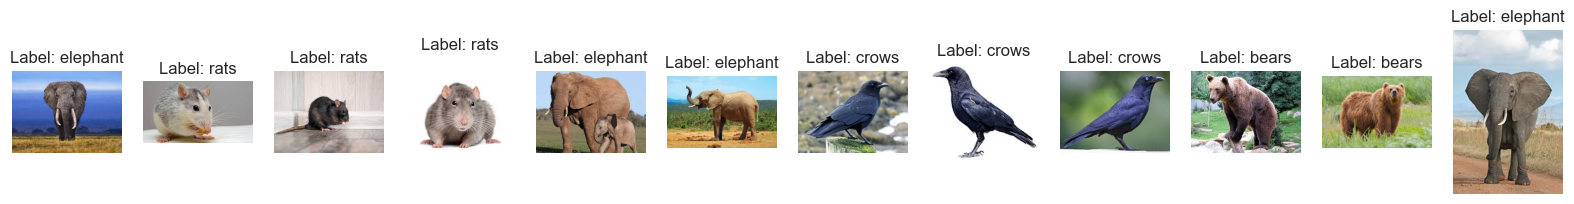

In [32]:
fig, axes = plt.subplots(1, 12, figsize=(20, 4))
for idx in range(12):
    image_path = os.path.join(test_dir, test_data.iloc[idx]['filename'])
    image = Image.open(image_path)
    axes[idx].imshow(image)
    axes[idx].set_title("Label: " + test_data.iloc[idx]['label'])
    axes[idx].axis('off')
plt.show()